In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [2]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=data_url, cache_dir='.', untar=True)

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
img_count = len(list(data_dir.glob("*/*.jpg")))
img_count

3670

In [5]:
roses = list(data_dir.glob("roses/*.jpg"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3654988152_b11178bbcb.jpg'),
 PosixPath('datasets/flower_photos/roses/21522100663_455b77a90c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg')]

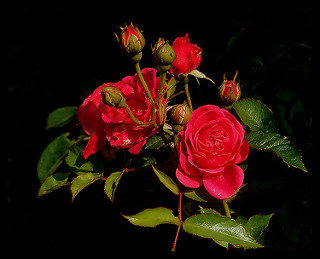

In [6]:
PIL.Image.open(str(roses[69]))

In [7]:
flower_img_dict = {}
flower_labels = {}
b=0
for flower in os.listdir(data_dir):
    if flower=="LICENSE.txt": continue
    flower_img_dict[flower] = list(data_dir.glob(flower+"/*.jpg"))
    flower_labels[flower] = b
    b+=1

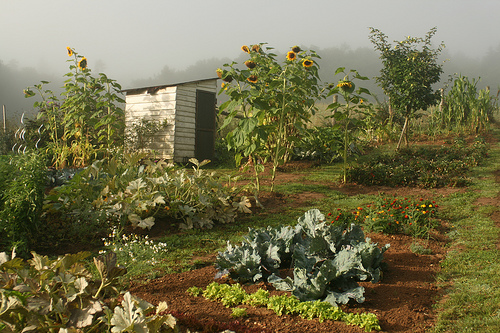

In [8]:
PIL.Image.open(flower_img_dict["sunflowers"][54])

In [9]:
flower_labels

{'daisy': 2, 'dandelion': 0, 'roses': 4, 'sunflowers': 1, 'tulips': 3}

In [10]:
img= cv2.imread(str(flower_img_dict["roses"][0]))
img.shape

(375, 500, 3)

In [11]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [12]:
X, y = [], []
import tqdm.notebook as nb
pb = nb.tqdm(total = img_count)
for flower, images in flower_img_dict.items():
    for image in images:
        pb.update(n=1)
        img = cv2.imread(str(image))
        img = cv2.resize(img, (180, 180))
        X.append(img)
        y.append(flower_labels[flower])

  0%|          | 0/3670 [00:00<?, ?it/s]

In [13]:
X, y = np.array(X)/255, np.array(y)

In [14]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(X, y, random_state=42)

In [15]:
x_train.shape, x_test.shape

((2752, 180, 180, 3), (918, 180, 180, 3))

In [16]:
x_train[0]

array([[[0.67058824, 0.69411765, 0.59215686],
        [0.61960784, 0.61568627, 0.57254902],
        [0.59215686, 0.58039216, 0.56470588],
        ...,
        [0.78431373, 0.72156863, 0.58823529],
        [0.72941176, 0.66666667, 0.50980392],
        [0.76862745, 0.7254902 , 0.56078431]],

       [[0.70980392, 0.69411765, 0.63137255],
        [0.62745098, 0.61176471, 0.56862745],
        [0.6745098 , 0.6627451 , 0.63921569],
        ...,
        [0.77647059, 0.70588235, 0.56862745],
        [0.77647059, 0.71372549, 0.57254902],
        [0.77647059, 0.73333333, 0.59215686]],

       [[0.68627451, 0.64313725, 0.60392157],
        [0.63921569, 0.60784314, 0.55294118],
        [0.65882353, 0.64313725, 0.6       ],
        ...,
        [0.81568627, 0.76862745, 0.56470588],
        [0.78823529, 0.72156863, 0.60784314],
        [0.76470588, 0.7254902 , 0.59215686]],

       ...,

       [[0.19215686, 0.4627451 , 0.55294118],
        [0.36862745, 0.54901961, 0.65882353],
        [0.36078431, 0

In [17]:
model = Sequential([
    layers.Conv2D(16, 3, padding="same", activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 14s 23ms/step - loss: 1.3874 - accuracy: 0.3972
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 1.0205 - accuracy: 0.5916
Epoch 3/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8306 - accuracy: 0.6806
Epoch 4/30
86/86 [==============================] - 2s 23ms/step - loss: 0.6551 - accuracy: 0.7645
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.4632 - accuracy: 0.8285
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.2974 - accuracy: 0.9048
Epoch 7/30
86/86 [==============================] - 2s 23ms/step - loss: 0.1589 - accuracy: 0.9506
Epoch 8/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0916 - accuracy: 0.9746
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0638 - accuracy: 0.9804
Epoch 10/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0771 - accuracy: 0.9767
Epoch 11

In [19]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 1s 21ms/step - loss: 3.2261 - accuracy: 0.6394


[3.226142644882202, 0.6394335627555847]

In [22]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]

In [26]:
y_pred[54], y_test[54]

(0, 2)

In [56]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

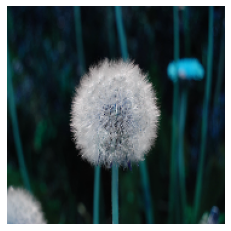

In [57]:
plt.axis('off')
plt.imshow(X[0])

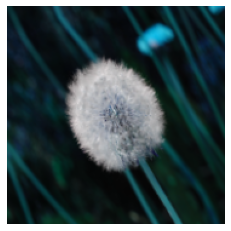

In [58]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("float32"))

In [60]:
model = Sequential([
    data_aug,
    layers.Conv2D(16, 3, padding="same", activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPool2D(),

    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [61]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 3s 26ms/step - loss: 1.3529 - accuracy: 0.4055
Epoch 2/30
86/86 [==============================] - 2s 25ms/step - loss: 1.0662 - accuracy: 0.5669
Epoch 3/30
86/86 [==============================] - 2s 25ms/step - loss: 0.9373 - accuracy: 0.6297
Epoch 4/30
86/86 [==============================] - 2s 25ms/step - loss: 0.8787 - accuracy: 0.6606
Epoch 5/30
86/86 [==============================] - 2s 25ms/step - loss: 0.8313 - accuracy: 0.6741
Epoch 6/30
86/86 [==============================] - 2s 25ms/step - loss: 0.7916 - accuracy: 0.6875
Epoch 7/30
86/86 [==============================] - 2s 25ms/step - loss: 0.7431 - accuracy: 0.7100
Epoch 8/30
86/86 [==============================] - 2s 25ms/step - loss: 0.7239 - accuracy: 0.7158
Epoch 9/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6947 - accuracy: 0.7318
Epoch 10/30
86/86 [==============================] - 2s 25ms/step - loss: 0.6685 - accuracy: 0.7369
Epoch 11/

In [62]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 1s 15ms/step - loss: 0.9111 - accuracy: 0.7364


[0.9110947251319885, 0.7363834381103516]